In [1]:
import numpy as np
import mmcv
import matplotlib.pyplot  as plt

In [6]:
!pwd

/home/wmf/Github/mmdetection/projects/tools


In [10]:
len(mmcv.load("../../vis/sparse_rcnn_r50_fpn_1x_coco_8bs_8stages_series_detach0.pkl")["scores"])

35728

In [45]:
np.std(ious_all),np.mean(ious_all)

(0.17675832695888677, 0.8744861434196257)

0.39244 0.07146


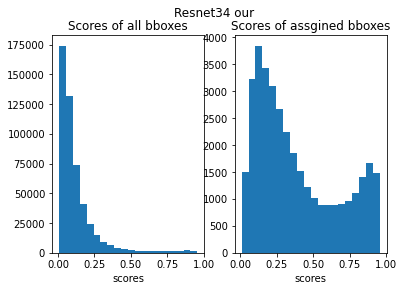

In [3]:
def draw_scores_hist(file_dir,save_dir,prediction_results_dir):
    ious_scores=mmcv.load(file_dir)
    results=mmcv.load(prediction_results_dir)
    scores_all =  np.array(ious_scores["scores"])
    nums=0
    valid=0
    scores=[]
    for result in results:
        for cat in result:
            if cat.size>0:
                nums+=cat.shape[0]
                valid+=np.sum(cat[:,4]>0.1)
                scores.extend(cat[:,4].tolist())
        
    print(valid/nums, len(scores_all)/nums)
    fig,axes=plt.subplots(1,2)
    fig.suptitle("Resnet34 our")
    ax1 = axes[0]
    ax2 = axes[1]
    ax2.hist(scores_all,bins=20)
    ax2.set_xlabel("scores") 
    ax2.set_title("Scores of assgined bboxes")
    ax1.hist(scores,bins=20)
    ax1.set_xlabel("scores") 
    ax1.set_title("Scores of all bboxes")
    fig.savefig(save_dir)
draw_scores_hist("vis/sparse_rcnn_r34_fpn_1x_coco_8stages_local_series_detach0stage.pkl","vis/sparse_rcnn_r34_fpn_1x_coco_8stages_local_series_detach0stage_hist_scores.png","/media/wmf/E453334932D7B3C31/workdir/sparse_rcnn_r34_fpn_1x_coco_8stages_local_series_detach0stage/test_results.pkl")

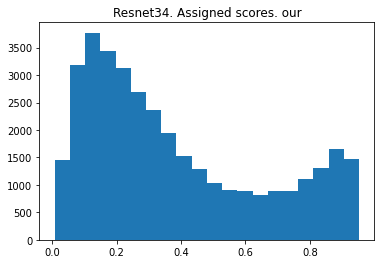

In [39]:
ious_scores=mmcv.load("/home/wmf/Github/mmdetection/vis/sparse_rcnn_r34_fpn_1x_coco_8stages_local.pkl")
scores_all = np.array(ious_scores["scores"])
plt.hist(scores_all,bins=20)
plt.title("Resnet34. Assigned scores. our")
plt.savefig("/home/wmf/Github/mmdetection/vis/sparse_rcnn_r34_fpn_1x_coco_8stages_local_hist_assigned_scores.png")


/home/wmf/anaconda3/envs/normal_dl/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


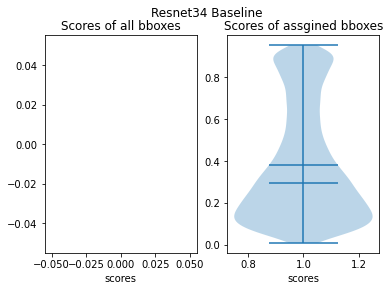

In [22]:
def draw_scores_hist(file_dir,save_dir,prediction_results_dir):
    ious_scores=mmcv.load(file_dir)
    results=mmcv.load(prediction_results_dir)
    scores_all =  np.array(ious_scores["scores"])
    nums=0
    valid=0
    scores=[]
    for result in results:
        for cat in result:
            if cat.size>0:
                nums+=cat.shape[0]
                valid+=np.sum(cat[:,4]>0.1)
                scores.extend(cat[:,4].tolist())

    fig,axes=plt.subplots(1,2)
    fig.suptitle("Resnet34 Baseline")
    ax1 = axes[0]
    ax2 = axes[1]
    ax2.violinplot(scores_all, showmedians=True, showmeans=True,showextrema=True,points=50000)
    ax2.set_xlabel("scores") 
    ax2.set_title("Scores of assgined bboxes")
    ax1.violinplot(scores, showmedians=True, showmeans=True,showextrema=True,points=1000)
    ax1.set_xlabel("scores") 
    ax1.set_title("Scores of all bboxes")
    fig.savefig(save_dir)
draw_scores_hist("../../vis/sparse_rcnn_r34_fpn_1x_coco_8stages_local.pkl","../../vis/sparse_rcnn_r34_fpn_1x_coco_8stages_local_violin_scores.png","/media/wmf/E453334932D7B3C31/workdir/sparse_rcnn_r34_fpn_1x_coco_8stages_local/test_results.pkl")

In [ ]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')




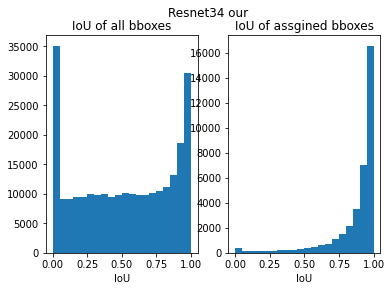

In [6]:
def draw_iou_hist(file_dir,save_dir):
    ious_scores=mmcv.load(file_dir)
    ious_assigned =  np.array(ious_scores["ious_assigned"])
    ious_all_bbox =  np.array(ious_scores["ious_all_bbox"])
    fig,axes=plt.subplots(1,2)
    fig.suptitle("Resnet34 our")
    ax1 = axes[0]
    ax2 = axes[1]
    ax2.hist(ious_assigned,bins=20)
    ax2.set_xlabel("IoU") 
    ax2.set_title("IoU of assgined bboxes")
    ax1.hist(ious_all_bbox,bins=20)
    ax1.set_xlabel("IoU") 
    ax1.set_title("IoU of all bboxes")
    fig.savefig(save_dir)
    
draw_iou_hist("/home/wmf/Github/mmdetection/vis/sparse_rcnn_r34_fpn_1x_coco_8stages_local.pkl","/home/wmf/Github/mmdetection/vis/sparse_rcnn_r34_fpn_1x_coco_8stages_local_hist_IoU.png")

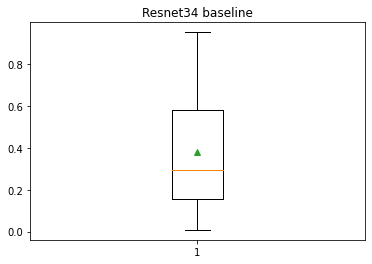

In [36]:
def draw_score_boxplot(file_dir,save_dir):
    ious_scores=mmcv.load(file_dir)
    scores_all =  np.array(ious_scores["scores"])
    
    plt.boxplot(scores_all,showmeans=True)
    plt.title("Resnet34 baseline")
    plt.savefig(save_dir)
draw_score_boxplot("/home/wmf/Github/mmdetection/vis/sparse_rcnn_r34_fpn_1x_coco_8stages_local.pkl","/home/wmf/Github/mmdetection/vis/sparse_rcnn_r34_fpn_1x_coco_8stages_local_boxplot_scores.png")

In [15]:
results=mmcv.load("/media/wmf/E453334932D7B3C31/workdir/sparse_rcnn_r34_fpn_1x_coco_8stages_local/test_results.pkl") 
scores=[]
for result in results:
    for cat in result:
        if cat.size>0:
            scores.extend(cat[:,4].tolist())

{'whiskers': [<matplotlib.lines.Line2D at 0x7f370316c320>,
 'caps': [<matplotlib.lines.Line2D at 0x7f370316c8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f370316c0b8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f370316ce80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3703895198>],
 'means': []}

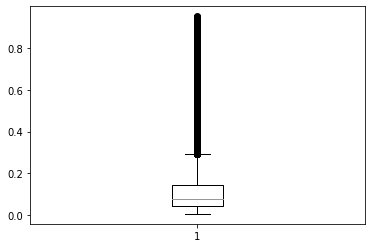

In [24]:
plt.boxplot